## Types of Regression Analysis

There are several types of regression analysis, including:

1. **Linear Regression**: Linear regression is used to model the relationship between a dependent variable and one or more independent variables, where the relationship is assumed to be linear.

2. **Polynomial regression**: a type of regression in which the independent variable is raised to a power, such as quadratic or cubic regression.

3. **Logistic regression**: used to model the probability of a binary outcome, such as yes or no.

4. **Ridge regression**: a technique used to prevent overfitting in multiple regression models by introducing a penalty for large coefficients.

5. **Lasso regression**: similar to ridge regression, but uses a different penalty function that can result in some coefficients being set to zero.

6. **Elastic Net Regression**: Elastic net regression is a combination of ridge and lasso regression and is used when both regularization and variable selection is required.

7. **Time-series regression**: used to analyze time-based data and make predictions about future values.

8. **Bayesian regression**: a type of regression that incorporates Bayesian probability theory to make predictions about the dependent variable.

9. **Nonlinear regression**: involves a dependent variable and one or more independent variables that have a nonlinear relationship.

10. **Poisson regression**: used when the dependent variable is a count or rate. or Poisson regression is used when the dependent variable is a count, and the independent variables are continuous or categorical.

### Linear regression

Given a data set $\left\{y_{i}, x_{i1}, \dotso,  x_{ip}\right\}_{i=1}^{n}$ of $n$ statistical units (samples), a linear regression model assumes that the relationship between the dependent variable $y$ and the vector of regressors $\mathbf{x}$ is linear.
$$ y_{i} = \beta_{0} + \beta_{1} x_{i1} + ... + \beta_{p} x_{ip} + \epsilon_{i} =   \mathbf{x}^T \mathbf{\beta} + \epsilon_{i}, \quad i = 1, \dotso,n$$


In matrix notation:

$$ \mathbf{y} = \begin{bmatrix}
y_{1}
\\y_{2}
\\\vdots
\\y_{n} 
\end{bmatrix}
$$


$$  \mathbf{X} = \begin{bmatrix}
\mathbf{x}_{1}^T
\\\mathbf{x}_{2}^T
\\\vdots
\\\mathbf{x}_{n}^T
\end{bmatrix} = \begin{bmatrix}
1 & x_{11} & \dotsm & x_{1p}
\\1 & x_{21} & \dotsm & x_{2p}
\\\vdots
\\1 & x_{n1} & \dotsm & x_{np}
\end{bmatrix} 
$$


$$ \boldsymbol{\beta} = \begin{bmatrix}
\beta_{0}
\\\beta_{1}
\\\beta_{2}
\\\vdots
\\\beta_{p} 
\end{bmatrix}
$$

$$ \boldsymbol{\epsilon} = \begin{bmatrix}
\epsilon_{1}
\\\epsilon_{2}
\\\vdots
\\\epsilon_{n} 
\end{bmatrix}
$$


Assumptions:



### Loss function:

$$ L(\boldsymbol{\beta}) = \frac{1}{2n} \sum_{i=1}^{n}  \left( \hat{y}_{i} - y_{i} \right) ^2 = \frac{1}{2n} \sum_{i=1}^{n}  \left( \mathbf{x}_{i}^T \boldsymbol{\beta} - y_{i} \right) ^2$$

### Gradient descent:

$$ \frac{\partial L}{\partial \boldsymbol{\beta}} = \frac{1}{2n} \sum_{i=1}^{n}  \left[ 2 \mathbf{x}_{i}^T \left( \mathbf{x}_{i}^T \boldsymbol{\beta}  \right) -2 y_{i} \mathbf{x}_{i}^T \right]  = \sum_{i=1}^{n} \mathbf{x}_{i}^T \left( \mathbf{x}_{i}^T \boldsymbol{\beta} - y_{i} \right) =  \frac{1}{n} \mathbf{X}^T \left( \mathbf{X} \boldsymbol{\beta} - \mathbf{y} \right)$$


### Feature Scaling:

Standardization (Z-score Normalization) 
$$ x' = \frac{x - \bar{x}}{\sigma} $$


In multi linear regression -- normalizing within the same feature across samples:

$$ \mu_{1} = \frac{1}{n} \left(x_{11} + x_{21} + \dotso + x_{n1} \right)$$

$$ \sigma_{1} = \sqrt{ \frac{\left(x_{11} - \mu_{1} \right)^2 + \left(x_{21} - \mu_{1} \right)^2 + \dotso + \left(x_{n1} - \mu_{1} \right)^2}{n} }$$ 

$$ x_{11} ^{'} = \frac{x_{11} - \mu_{1}}{\sigma_{1}} $$

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
print("Shape of Dataset : ", diabetes.data.shape)
print("Feature names : ", diabetes.feature_names)
print("Target Values : ", diabetes.target[:10])

X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target   

print(X.head())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(y_train.shape)

Shape of Dataset :  (442, 10)
Feature names :  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target Values :  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]
        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
(353, 10)
(353,)


In [18]:
class linear_regression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.beta = None
        self.loss = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.beta = np.zeros(n_features)
        self.loss = []
        prediction = X @ self.beta
        
        # gradient descent
        for _ in range(self.n_iters):
            gradient = (1/n_samples) * X.T @ (prediction - y)
            self.beta -= self.lr * gradient
            prediction = X @ self.beta
            self.loss.append(np.mean((prediction - y) ** 2))
    
    def predict(self, X):
        y_pred = X @ self.beta
        return y_pred
        

In [19]:
model = linear_regression(learning_rate=0.2, n_iters=50000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

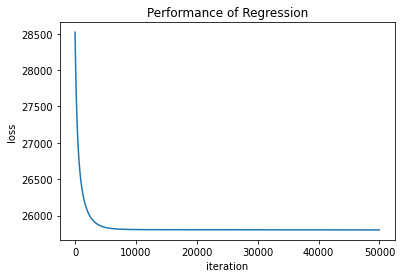

In [20]:
idx = range(0, len(model.loss))

fig, ax = plt.subplots()
ax.plot(idx, model.loss)
ax.set(xlabel="iteration",
       ylabel="loss",
       title="Performance of Regression")
plt.show()

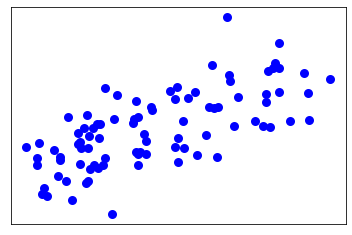

In [24]:
# Plot outputs
plt.scatter(y_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [21]:
model.beta

age    262.080418
sex   -398.915354
bmi    501.576342
bp     323.954180
s1    -211.290373
s2    -103.304134
s3    -209.686522
s4     113.024732
s5     401.459332
s6     -54.953393
dtype: float64